In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [225]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [227]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [228]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [229]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [230]:
df["Embarked"] = df["Embarked"].fillna('U')

In [231]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [232]:
df["Embarked"].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [233]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [234]:
from sklearn.preprocessing import OrdinalEncoder
sex = ["female", "male"]
ord = OrdinalEncoder(categories = [sex], dtype = int)
df["Sex"] = ord.fit_transform(df[["Sex"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [127]:
embarked = ['S', 'C', 'Q', 'U']
ord2 = OrdinalEncoder(categories = [embarked], dtype = int)
df["Embarked"] = ord2.fit_transform(df[["Embarked"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### Some Visualizations

Comparison between Sex & Survived

In [150]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
0,81,233
1,468,109


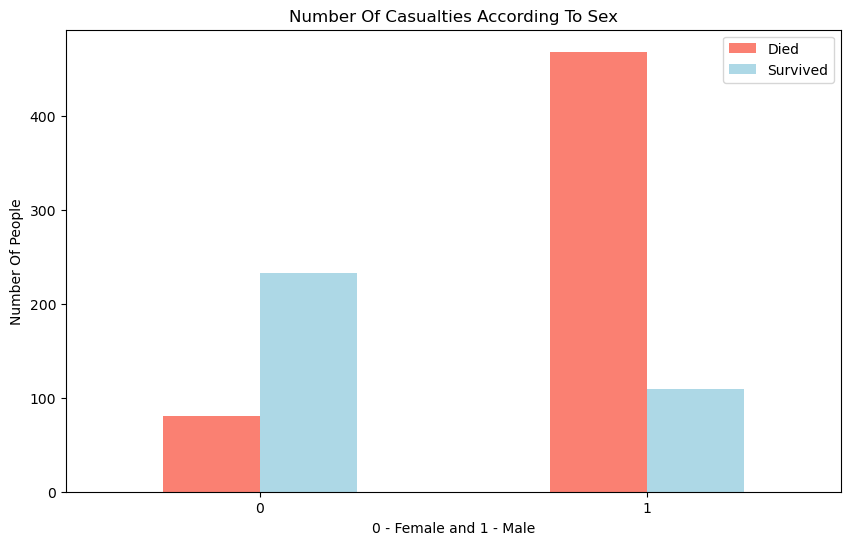

In [155]:
pd.crosstab(df["Sex"], df["Survived"]).plot(kind = "bar",
                                           color = ["salmon", "lightblue"],
                                           figsize = (10,6))
plt.title("Number Of Casualties According To Sex")
plt.xlabel("0 - Female and 1 - Male")
plt.ylabel("Number Of People")
plt.legend(["Died", "Survived"])
plt.xticks(rotation = 0);

Comparision Between Passenger Class and Survived

In [156]:
pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


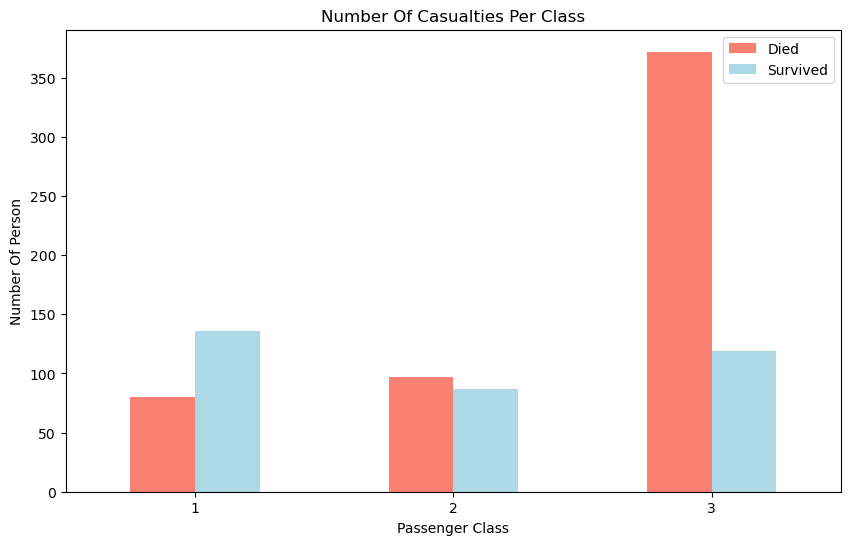

In [161]:
pd.crosstab(df["Pclass"], df["Survived"]).plot(kind = "bar",
                                               color = ["salmon", "lightblue"],
                                               figsize = (10,6))
plt.title("Number Of Casualties Per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number Of Person")
plt.legend(["Died", "Survived"])
plt.xticks(rotation = 0);

### Trying Different Models

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [174]:
def model_classification(x, y):
    """
    Returns best model and it's accuracy
    """
    np.random.seed(42)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    models = [RandomForestClassifier(),
             LogisticRegression(),
             KNeighborsClassifier(),
             GradientBoostingClassifier()]
    results = []
    for model in models:
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        print(f"Model Name: ", model)
        print(f"Accuracy: ", accuracy_score(y_test, y_preds))
        print(f"Confusion Matrix: ", confusion_matrix(y_test, y_preds), "\n")
        print(f"Classification Report: ", classification_report(y_test, y_preds))
        print("-" * 100)
        results.append(accuracy_score(y_test, y_preds))
    
    # Best Model
    best_model = models[results.index(max(results))]
    print("Best Model: ", best_model)
    print("Best Model Accuracy: ", max(results))
    
    models = pd.DataFrame({'Model' : ['RandomForestClassifier', 
                                      'LogisticRegression', 
                                      'KNeighborsClassifier', 
                                      'GradientBoostingClassifier'],
                          'Score' : results})
    print(models.sort_values(by = 'Score', ascending = False, ignore_index = True))
    return best_model, max(results), confusion_matrix(y_test, y_preds)

In [175]:
model_classification(x_train, y_train)

Model Name:  RandomForestClassifier()
Accuracy:  0.794392523364486
Confusion Matrix:  [[111  25]
 [ 19  59]] 

Classification Report:                precision    recall  f1-score   support

           0       0.85      0.82      0.83       136
           1       0.70      0.76      0.73        78

    accuracy                           0.79       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.80      0.79      0.80       214

----------------------------------------------------------------------------------------------------
Model Name:  LogisticRegression()
Accuracy:  0.8177570093457944
Confusion Matrix:  [[119  17]
 [ 22  56]] 

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.88      0.86       136
           1       0.77      0.72      0.74        78

    accuracy                           0.82       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.82      0.82

C:\Users\shiva\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(GradientBoostingClassifier(),
 0.8317757009345794,
 array([[120,  16],
        [ 20,  58]], dtype=int64))

In [132]:
# GradientBoostingClassifier turns out to be the best model
gbc = GradientBoostingClassifier()
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [134]:
grid = {"n_estimators" : [10, 100, 1000],
        "max_depth" : [3, 4, 5, 6],
        "min_samples_leaf" : [1, 2, 5],
        "min_samples_split" : [2, 5, 10],
        "max_features" : ['auto', 'sqrt']}

In [135]:
from sklearn.model_selection import GridSearchCV
gs_gbc = GridSearchCV(estimator = gbc, param_grid = grid, cv = 3, scoring = "accuracy")
gs_gbc.fit(x_train, y_train)

C:\Users\shiva\heart-disease\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiva\heart-disease\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiva\heart-disease\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shiva\heart-disease\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [137]:
gs_gbc_y_preds = gs_gbc.predict(x_test)

In [176]:
gs_gbc_accuracy = accuracy_score(y_test, gs_gbc_y_preds)
gs_gbc_accuracy

0.8268156424581006

## Correlation Matrix

In [170]:
corr_mat = df.corr()
corr_mat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.118026
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.028566
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.128526
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.023578
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.063794
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.082144
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.071010
Embarked,0.118026,0.028566,-0.128526,0.023578,-0.063794,-0.082144,0.071010,1.000000


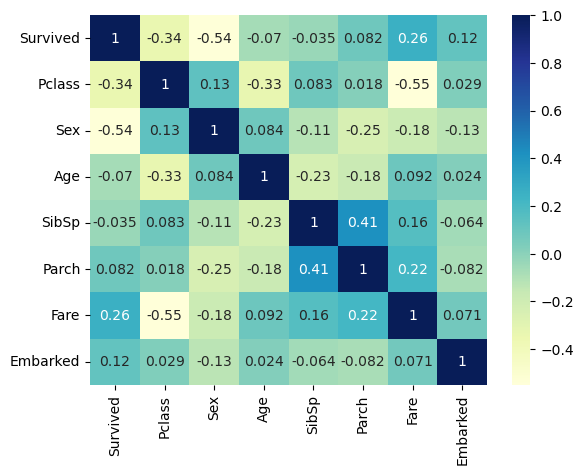

In [147]:
corr_map = sns.heatmap(corr_mat, cmap = "YlGnBu", annot = True);

## ROC Curve & AUC Score

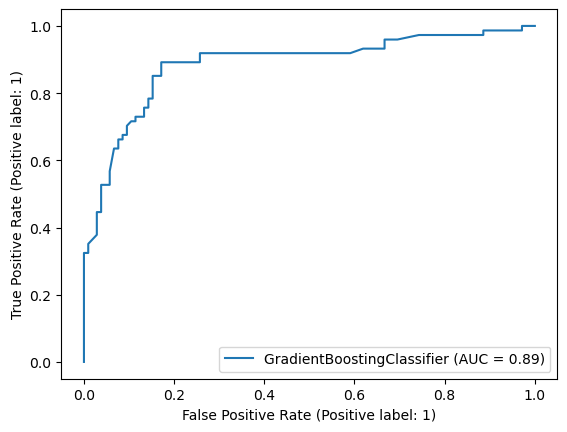

In [169]:
from sklearn.metrics import RocCurveDisplay
gbc.fit(x_train, y_train)
RocCurveDisplay.from_estimator(gbc, x_test, y_test);

In [177]:
# Final Submission
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_preds = gbc.predict(x_test)
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.8156424581005587

## Importing and Cleaning the Test Data

In [204]:
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [205]:
test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [206]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [207]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [208]:
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [209]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [210]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [211]:
sex = ["female", "male"]
ord = OrdinalEncoder(categories = [sex], dtype = int)
test["Sex"] = ord.fit_transform(test[["Sex"]])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [212]:
embarked = ['S', 'C', 'Q', 'U']
ord2 = OrdinalEncoder(categories = [embarked], dtype = int)
test["Embarked"] = ord2.fit_transform(test[["Embarked"]])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [213]:
submission_preds = gbc.predict(test)
submission_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [220]:
submit = pd.DataFrame({"PassengerId" : test_ids.values,
                      "Survived" : submission_preds})

In [221]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [222]:
submit.to_csv("submission.csv", index = False)